# mRNA 데이터를 활용한 암종류 예측하기 (TensorFlow 활용)
## - 일부 train data 활용, feature 전체 활용

## 데이터의 이해 :

* 마이크로어레이(micro-array)란? 기능 유전체학 연구에 혁명적인 발상의 전환을 가져온 기술이다. 기존의 방법이 개별 유전자 발현을 측정하는 반면, 마이크로어레이 기술은 한 번의 실험으로 수천에서 수만 개의 유전자 발현을 측정할 수 있다. 쉬나(Shena) 등은 1995년에 실험실에서 직접 제작한 마이크로어레이 기판을 이용하여  세포에서 발현하는 전사체(transcriptome)의 발현을 측정하였다. 이러한 유전자 발현 마이크로어레이(gene expression microarray)의 등장으로 한 세포에서 대용량의 유전체 정보를 손쉽게 측정할 수 있는 고효율 실험기법(high-throughput technolgy)이 발달하기 시작하였다. 


* 유전자료의 일반적인 형태는 'DNA 마이크로어레이 칩'으로 동시에 수천만 개의 유전자 양상을 관찰할 수 있는 방법이다. 마이크로어레이는 많은 자료를 가지고 질병 간 또는 유전자 간 어떤 특성을 찾아내어 방대한 서열정보를 바탕으로 유전체의 구조와 기능을 밝히는 필수적인 도구이다. 이것은 실제로 1cm 정도의 손톱만한 크기에 수천만의 자료가 집적되어 있어서 우리가 그것을 통해 질병 간, 유전자 간 정보 특성을 찾아낸다. DNA 분자를 고밀도로 배열해서 그것으로부터 얻은 메신저 RNA(mRNA)의 발현 정도를 관찰 실험을 통해서 찾아내는 것이 DNA 마이크로어레이 칩이다.

## 1. 데이터 준비

In [2]:
# 필요 모듈 로딩
import os
import tensorflow as tf
import numpy as np
import gzip, cPickle
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 미리 데이터를 다운로드 받은 폴더를 작업폴더로 설정
import os
os.chdir('/Users/joikyeon/Documents/BigBio/mRNA')
os.getcwd()

'/Users/joikyeon/Documents/BigBio/mRNA'

In [4]:
# 파일 목록을 출력 (glob모듈 활용)

# 파일종류는 아래와 같음
# - Training set: *type1*
# - Validation set: *type2*
# - Test set : *type3*

glob('*.*')

['mrna_20160125-200855_type1_00.pkl.gz',
 'mrna_20160125-200855_type1_01.pkl.gz',
 'mrna_20160125-200855_type1_02.pkl.gz',
 'mrna_20160125-200855_type1_03.pkl.gz',
 'mrna_20160125-200855_type1_04.pkl.gz',
 'mrna_20160125-200855_type1_05.pkl.gz',
 'mrna_20160125-200855_type1_06.pkl.gz',
 'mrna_20160125-200855_type1_07.pkl.gz',
 'mrna_20160125-200855_type1_08.pkl.gz',
 'mrna_20160125-200855_type1_09.pkl.gz',
 'mrna_20160125-200855_type1_10.pkl.gz',
 'mrna_20160125-200855_type1_11.pkl.gz',
 'mrna_20160125-200855_type1_12.pkl.gz',
 'mrna_20160125-200855_type1_13.pkl.gz',
 'mrna_20160125-200855_type1_14.pkl.gz',
 'mrna_20160125-200855_type1_15.pkl.gz',
 'mrna_20160125-200855_type2_00.pkl.gz',
 'mrna_20160125-200855_type2_01.pkl.gz',
 'mrna_20160125-200855_type2_02.pkl.gz',
 'mrna_20160125-200855_type2_03.pkl.gz',
 'mrna_20160125-200855_type3_00.pkl.gz',
 'mrna_20160125-200855_type3_01.pkl.gz',
 'mrna_20160125-200855_type3_02.pkl.gz',
 'mrna_20160125-200855_type3_03.pkl.gz']

## 2. 첫번째 training data으로 데이터 탐색

In [5]:
# 우선 첫번째 training set 파일만 열어 봄
f=gzip.open('mrna_20160125-200855_type1_00.pkl.gz', 'rb') # gzip모듈로 압축 풀기
train00=cPickle.load(f)   # cPickle모듈로 데이터 읽어오기
f.close()

print(train00)

(array([[  6.51879000e+01,   0.00000000e+00,   8.17000000e-01, ...,
          1.80718950e+03,   1.55229000e+01,   0.00000000e+00],
       [  1.10396900e+02,   0.00000000e+00,   2.09220000e+00, ...,
          9.63975200e+02,   5.51814000e+01,   0.00000000e+00],
       [  3.10196000e+01,   0.00000000e+00,   1.24340000e+00, ...,
          1.05564190e+03,   3.53745700e+02,   0.00000000e+00],
       ..., 
       [  1.69565000e+01,   2.79194000e+02,   0.00000000e+00, ...,
          4.99610400e+02,   8.46040000e+00,   0.00000000e+00],
       [  9.30870000e+01,   0.00000000e+00,   4.56200000e-01, ...,
          1.01174590e+03,   1.36846000e+01,   0.00000000e+00],
       [  3.94132000e+01,   0.00000000e+00,   6.17700000e-01, ...,
          1.30667080e+03,   9.88260000e+00,   0.00000000e+00]]), array([32, 30,  3,  3, 32, 26, 11,  6,  3,  4, 18, 18, 14, 20, 13, 28, 27,
        3, 21, 18, 30, 30,  3, 14, 18,  3, 31, 11, 24,  3, 19, 30, 13, 24,
       24,  5,  3, 16,  6, 30,  5, 18, 23,  3, 13, 12,

In [6]:
len(train00)

2

In [7]:
# x(feature)와 y데이터(label)로 구분
train0_x=train00[0] # feature : 유전자별 발현량(gene expressioon)
train0_y=train00[1]-1 # 라벨변수(타겟변수) : 암의 종류(type of cancer)를 나타냄

print(train0_x.shape)
print(train0_y.shape)

(500, 20502)
(500,)


type of cancer: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]


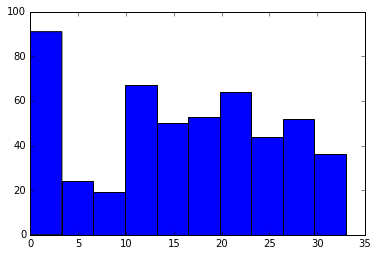

In [8]:
print "type of cancer:", np.unique(train0_y)
plt.hist(train0_y)
plt.show()

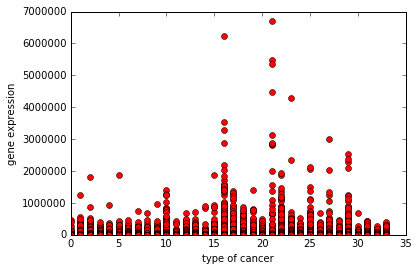

In [95]:
# 암 종류별 feaure들의 분포
plt.plot(train0_y, train0_x, 'ro')
plt.xlabel('type of cancer')
plt.ylabel('gene expression')
plt.show()

## 3. Tensorflow 활용하기
## 1) 모형 훈련시키기 (by training set)

### 현재 상황은 MNIST 숫자인식 문제와 유사!!!
> **참고자료: **  (https://www.tensorflow.org/versions/r0.8/tutorials/mnist/beginners/index.html#softmax-regressions)
 

In [9]:
# label 변수의 one-hot encoding
# pandas 모듈의 get_dummies() 함수 이용 <- 혹시 다른 함수가?

import pandas as pd
print(pd.get_dummies(train0_y).values)
train0_y_onehot=pd.get_dummies(train0_y).values

[[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]]


In [10]:
train0_y_onehot.shape

(500, 34)

In [11]:
bias=np.ones((train0_x.shape[0],1))

In [12]:
bias.shape

(500, 1)

In [13]:
train0_x_final=np.hstack((bias,train0_x))   

In [14]:
print train0_x_final.shape

(500, 20503)


In [15]:
print train0_x_final

[[  1.00000000e+00   6.51879000e+01   0.00000000e+00 ...,   1.80718950e+03
    1.55229000e+01   0.00000000e+00]
 [  1.00000000e+00   1.10396900e+02   0.00000000e+00 ...,   9.63975200e+02
    5.51814000e+01   0.00000000e+00]
 [  1.00000000e+00   3.10196000e+01   0.00000000e+00 ...,   1.05564190e+03
    3.53745700e+02   0.00000000e+00]
 ..., 
 [  1.00000000e+00   1.69565000e+01   2.79194000e+02 ...,   4.99610400e+02
    8.46040000e+00   0.00000000e+00]
 [  1.00000000e+00   9.30870000e+01   0.00000000e+00 ...,   1.01174590e+03
    1.36846000e+01   0.00000000e+00]
 [  1.00000000e+00   3.94132000e+01   0.00000000e+00 ...,   1.30667080e+03
    9.88260000e+00   0.00000000e+00]]


In [16]:
x_data=train0_x_final
y_data=train0_y_onehot

In [17]:
print x_data.shape ; print y_data.shape

(500, 20503)
(500, 34)


In [18]:
# tf Graph Input
X=tf.placeholder("float", [None,20503]) 
Y=tf.placeholder("float", [None,34])

In [19]:
# 모델의 가중치(weight) 설정
W=tf.Variable(tf.zeros([20503,34]))

In [20]:
# 모델 구축
hypothesis=tf.nn.softmax(tf.matmul(X,W))  # softmax 함수 사용. 이 때, X와 W의 순서에 주의할 것!!! 

In [21]:
# learning rate
learning_rate=0.01

In [22]:
# cross entropy cost function 세팅
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), reduction_indices=[1]))

In [23]:
# Gradient Descent
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [24]:
# 변수 초기화(Initialize variable)
init=tf.initialize_all_variables()

In [25]:
# Launch the Graph
sess=tf.Session()
sess.run(init)
    
for step in xrange(2001):
    sess.run(optimizer, feed_dict={X:x_data, Y:y_data})
    if step%200==0:
            print step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W)

0 nan [[ -2.74117745e-04  -3.41175619e-05   1.00588333e-03 ...,   2.65882321e-04
   -2.34117659e-04  -2.34117615e-04]
 [ -4.02310014e-01  -3.76395643e-01  -1.21127144e-01 ...,  -3.38238209e-01
   -3.61247659e-01  -3.83493841e-01]
 [ -2.83396095e-02  -2.82128714e-02  -2.81442422e-02 ...,  -2.82366946e-02
   -2.83396076e-02  -2.83396076e-02]
 ..., 
 [ -2.18175992e-01   2.02028193e-02   9.52400625e-01 ...,   1.69208258e-01
   -1.91159248e-01  -1.85680658e-01]
 [ -3.93528640e-02  -3.26615199e-02   2.52928585e-01 ...,  -2.84527559e-02
   -4.70195524e-02  -4.40529585e-02]
 [ -8.26291041e-04  -7.90165039e-04  -7.72064959e-04 ...,  -8.27475102e-04
   -8.54407088e-04  -8.54407088e-04]]
200 nan [[ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 ..., 
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]]
400 nan [[ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  n

## 2) 모형의 평가(by test set)

In [26]:
# 첫번째 test set만 열어 봄
f=gzip.open('mrna_20160125-200855_type3_00.pkl.gz', 'rb') # gzip모듈로 압축 풀기
test00=cPickle.load(f)   # cPickle모듈로 데이터 읽어오기
f.close()

print(test00)

(array([[  6.51879000e+01,   0.00000000e+00,   8.17000000e-01, ...,
          1.80718950e+03,   1.55229000e+01,   0.00000000e+00],
       [  3.17549700e+02,   0.00000000e+00,   0.00000000e+00, ...,
          1.11243050e+03,   3.29469400e+02,   0.00000000e+00],
       [  3.78209000e+01,   4.70600000e-01,   0.00000000e+00, ...,
          1.08483350e+03,   5.64770000e+00,   0.00000000e+00],
       ..., 
       [  1.17023600e+02,   2.01508200e+02,   0.00000000e+00, ...,
          4.61298800e+02,   3.78215000e+01,   6.20000000e-01],
       [  7.55637000e+01,   0.00000000e+00,   8.74400000e-01, ...,
          1.02951250e+03,   6.83232500e+02,   0.00000000e+00],
       [  5.25580000e+01,   1.11830000e+00,   0.00000000e+00, ...,
          3.95862500e+02,   1.56556000e+01,   5.59100000e-01]]), array([ 9, 34, 19,  6,  4,  9,  9, 14, 15, 13,  3, 32, 15, 18, 16, 28,  4,
       11, 27,  3,  2, 27, 32, 16, 30, 24, 14, 19, 19,  3, 12,  8, 14, 18,
       28, 19, 18, 29, 10, 16, 17, 30, 24,  3, 24, 11,

In [27]:
test0_x=test00[0] # feature : 유전자별 발현량(gene expressioon)
test0_y=test00[1]-1 # 라벨변수(타겟변수) : 암의 종류(type of cancer)를 나타냄

print(test0_x.shape)
print(test0_y.shape)

(500, 20502)
(500,)


In [28]:
bias=np.ones((test0_x.shape[0],1))
test0_x_final=np.hstack((bias,test0_x)) 
print test0_x_final.shape

(500, 20503)


In [29]:
print(pd.get_dummies(test0_y).values)
test0_y_onehot=pd.get_dummies(test0_y).values

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]]


In [30]:
x_test=test0_x_final
y_test=test0_y_onehot

In [31]:
print '---------------- test  ------------------'

a=sess.run(hypothesis, feed_dict={X:x_test, Y:y_test})
print a, sess.run(tf.arg_max(a,1))

---------------- test  ------------------


ValueError: Cannot feed value of shape (500, 32) for Tensor u'Placeholder_1:0', which has shape (Dimension(None), Dimension(34))

In [32]:
# (www.tensorflow.org와의 notation 차이점) x,y_,y ==> X,Y,hypothesis

correct_prediction = tf.equal(tf.argmax(hypothesis,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

ValueError: Cannot feed value of shape (500, 32) for Tensor u'Placeholder_1:0', which has shape (Dimension(None), Dimension(34))